In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

## 1. Import

In [3]:
genres = pd.read_csv('../DataBase/raw/genres.csv', sep=',')
echonest_features = pd.read_csv('../DataBase/raw/echonest_features.tsv', sep='\t')
spectral_features = pd.read_csv('../DataBase/raw/spectral_features.tsv', sep='\t')
tracks = pd.read_csv('../DataBase/raw/tracks.tsv', sep='\t')

tracks.rename(
    columns={
        "genre_top": "genre_title"
    },
    inplace=True
)

## 2. Data cleaning

In [4]:
print(f"Shape of genres : {genres.shape}, echonest_features : {echonest_features.shape}")
print(f"spectral_features : {spectral_features.shape}, tracks : {tracks.shape}")

Shape of genres : (164, 5), echonest_features : (11440, 9)
spectral_features : (99995, 22), tracks : (99995, 14)


In [5]:
df = pd.merge(
    left=tracks,
    right=spectral_features,
    on="track_id",
    how="left",
)
df = pd.merge(
    left=df,
    right=echonest_features,
    on="track_id",
    how="left",
)
df = pd.merge(
    left=df,
    right=genres,
    on="genre_title",
    how="left",
)

In [6]:
df.shape

(99995, 47)

In [7]:
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
missing_values = df.isnull().sum()
print(f"\nTotal missing percentage per column: {missing_values[missing_values>0]/df.shape[0]}")
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print("\nData Types:")
print(df.dtypes)



Total missing values: 1156867

Total missing percentage per column: album_title         0.009110
artist_latitude     0.597910
artist_longitude    0.597910
genre_title         0.553648
title               0.000010
acousticness        0.894465
danceability        0.894655
energy              0.894465
instrumentalness    0.894465
liveness            0.894465
speechiness         0.895915
tempo               0.894465
valence             0.894675
genre_id            0.553648
genre_color         0.553648
genre_handle        0.553648
genre_parent_id     0.992150
dtype: float64

Duplicate rows: 0

Data Types:
track_id                            int64
album_title                        object
album_tracks                        int64
artist_latitude                   float64
artist_longitude                  float64
artist_name                        object
duration                            int64
favorites                           int64
genre_title                        object
genres       

In [8]:
df.head(10)

,track_id,album_title,album_tracks,artist_latitude,artist_longitude,artist_name,duration,favorites,genre_title,genres,...,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_id,genre_color,genre_handle,genre_parent_id
0,11870,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,131,0,Hip-Hop,[21],...,0.645929,0.769285,0.195042,0.101240,159.908,0.474554,21.0,#CC0000,Hip-Hop,NaN
1,11871,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,185,0,Hip-Hop,[21],...,0.694364,0.950413,0.269082,0.180927,188.077,0.585049,21.0,#CC0000,Hip-Hop,NaN
2,11872,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,183,0,Hip-Hop,[21],...,0.608690,0.725811,0.125451,0.623711,137.676,0.522381,21.0,#CC0000,Hip-Hop,NaN
3,11873,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,213,3,Hip-Hop,[21],...,0.743163,0.786033,0.214622,0.142762,79.371,0.644394,21.0,#CC0000,Hip-Hop,NaN
4,11874,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,162,0,Hip-Hop,[21],...,0.588584,0.861204,0.120561,0.187306,190.518,0.537996,21.0,#CC0000,Hip-Hop,NaN
5,11875,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,147,1,Hip-Hop,[21],...,0.604813,0.180237,0.118654,0.245487,183.188,0.363639,21.0,#CC0000,Hip-Hop,NaN
6,11876,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,148,0,Hip-Hop,[21],...,0.728002,0.665388,0.291485,0.057386,74.336,0.404232,21.0,#CC0000,Hip-Hop,NaN
7,11877,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,256,0,Hip-Hop,[21],...,0.646284,0.784284,0.704447,0.064002,64.077,0.113708,21.0,#CC0000,Hip-Hop,NaN
8,11878,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,338,0,Hip-Hop,[21],...,0.369506,0.000011,0.115093,0.049099,61.544,0.038714,21.0,#CC0000,Hip-Hop,NaN
9,11879,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,185,0,Hip-Hop,[21],...,0.526655,0.126002,0.110249,0.579148,204.562,0.493631,21.0,#CC0000,Hip-Hop,NaN


In [9]:
df.info

<bound method DataFrame.info of        track_id                    album_title  album_tracks  artist_latitude  \
0         11870           Wildahead Portibeast            10              NaN   
1         11871           Wildahead Portibeast            10              NaN   
2         11872           Wildahead Portibeast            10              NaN   
3         11873           Wildahead Portibeast            10              NaN   
4         11874           Wildahead Portibeast            10              NaN   
...         ...                            ...           ...              ...   
99990    155316  Live at Monty Hall, 2/17/2017             6              NaN   
99991    155317  Live at Monty Hall, 2/17/2017             6              NaN   
99992    155318  Live at Monty Hall, 2/17/2017             6              NaN   
99993    155319  Live at Monty Hall, 2/17/2017             6              NaN   
99994    155320      What I Tell Myself Vol. 2            11              NaN

In [10]:
genres_labels = df['genre_title'].unique()
genres_labels

array(['Hip-Hop', nan, 'Rock', 'Electronic', 'Pop', 'International',
       'Experimental', 'Blues', 'Jazz', 'Folk', 'Country', 'Spoken',
       'Classical', 'Instrumental', 'Old-Time / Historic', 'Soul-RnB',
       'Easy Listening'], dtype=object)

In [11]:
cols_high_miss = missing_values[missing_values>80000].index.to_list()
cols_high_miss.remove('genre_parent_id')
print(cols_high_miss)
# df_cleaned = df.drop(list_col_to_drop, axis=1)
df_cleaned = df.dropna(subset=cols_high_miss)
missing_values = df_cleaned.isnull().sum()
print(f"\nTotal missing percentage per column: {missing_values[missing_values>0]/df_cleaned.shape[0]}")

['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

Total missing percentage per column: artist_latitude     0.407361
artist_longitude    0.407361
genre_title         0.340092
title               0.000096
genre_id            0.340092
genre_color         0.340092
genre_handle        0.340092
genre_parent_id     0.968672
dtype: float64


Option 1 : supprimer les lignes avec données manquantes --> il resterait environ 6000 tracks
Option 2 : drop les colonnes avec >80% de données manquantes

## 3. Data visualisation

In [12]:
df_cleaned = df_cleaned.dropna(subset=['genre_title'])
missing_values = df_cleaned.isnull().sum()
print(f"\nTotal missing percentage per column: {missing_values[missing_values>0]/df_cleaned.shape[0]}")


Total missing percentage per column: artist_latitude     0.421873
artist_longitude    0.421873
title               0.000146
genre_parent_id     0.952527
dtype: float64


In [13]:
features = df_cleaned.describe().columns.to_list()
list = ['track_id', 'album_tracks', 'artist_latitude', 'artist_longitude', 'genre_id', 'interest', 'listens', 'favorites']
features= [x for x in features if x not in list]
features


['duration',
 'spectral_bandwidth_kurtosis_01',
 'spectral_bandwidth_max_01',
 'spectral_bandwidth_mean_01',
 'spectral_bandwidth_median_01',
 'spectral_bandwidth_min_01',
 'spectral_bandwidth_skew_01',
 'spectral_bandwidth_std_01',
 'spectral_centroid_kurtosis_01',
 'spectral_centroid_max_01',
 'spectral_centroid_mean_01',
 'spectral_centroid_median_01',
 'spectral_centroid_min_01',
 'spectral_centroid_skew_01',
 'spectral_centroid_std_01',
 'spectral_rolloff_kurtosis_01',
 'spectral_rolloff_max_01',
 'spectral_rolloff_mean_01',
 'spectral_rolloff_median_01',
 'spectral_rolloff_min_01',
 'spectral_rolloff_skew_01',
 'spectral_rolloff_std_01',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence',
 'genre_parent_id']

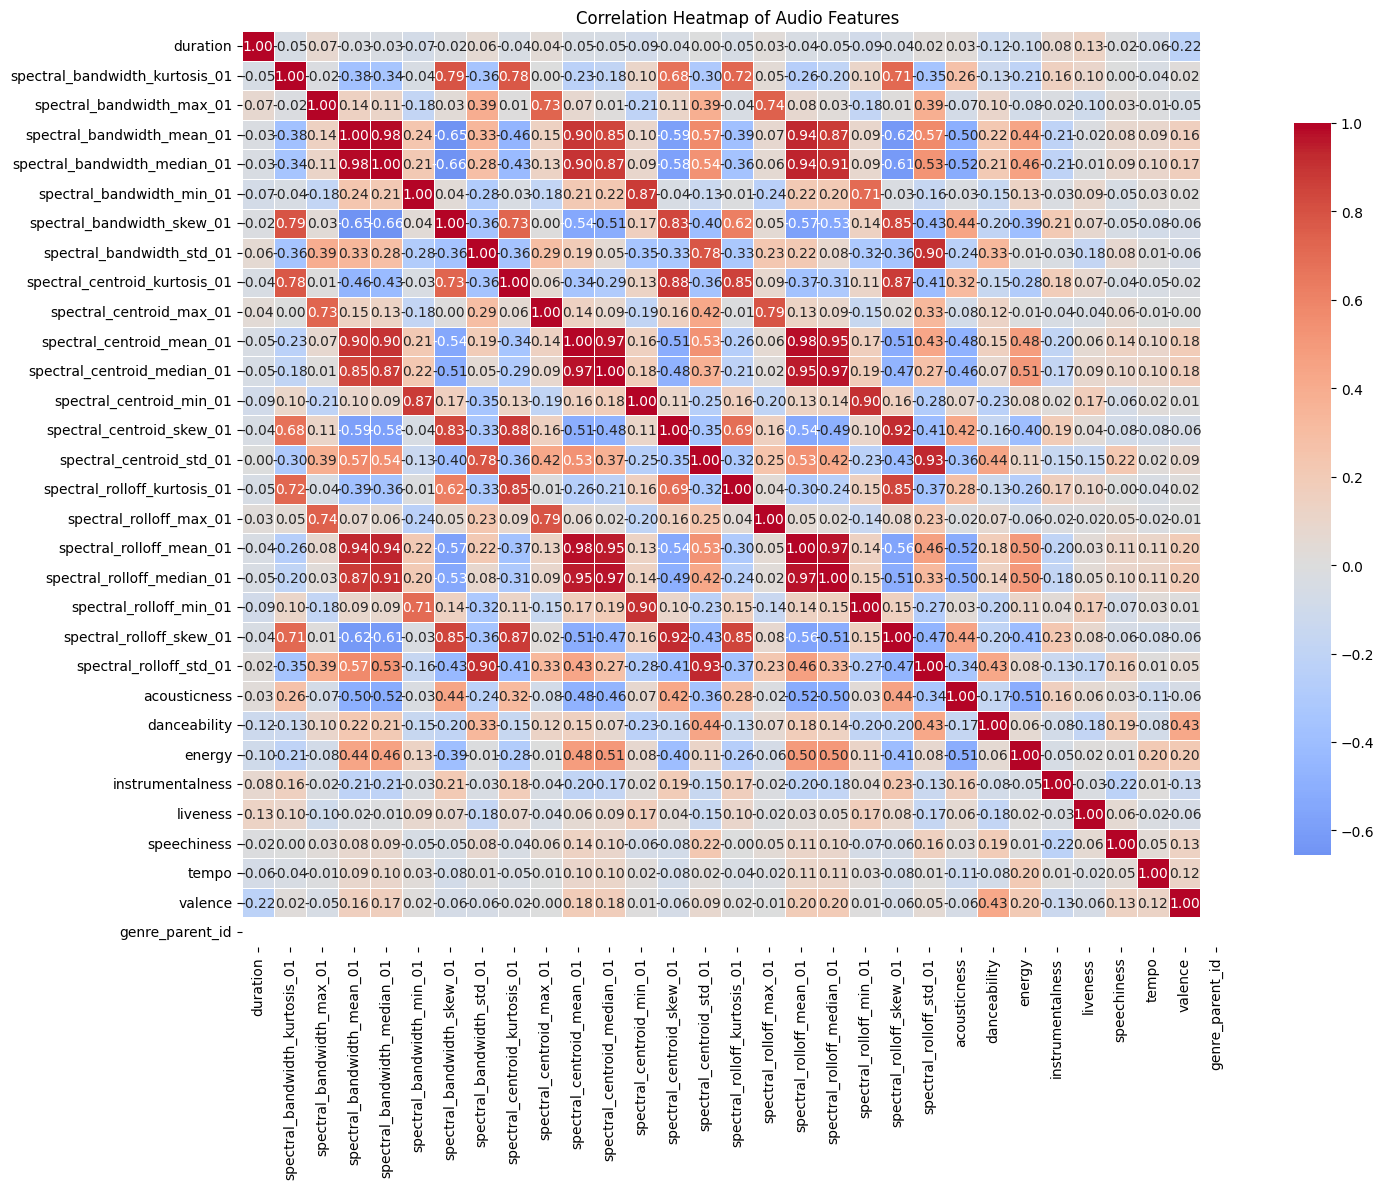

In [14]:
plt.figure(figsize=(15, 12))

sns.heatmap(
    df_cleaned[features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Audio Features")
plt.tight_layout()
plt.show()

# 3. Features engineering

In [15]:
if 'duration' in df_cleaned.columns:
    df_cleaned['duration_minutes'] = df_cleaned['duration'] / 60
    df_cleaned['is_short_track'] = (df_cleaned['duration'] < 120).astype(int)
    df_cleaned['is_long_track'] = (df_cleaned['duration'] > 300).astype(int)

if 'interest' in df_cleaned.columns and 'listens' in df_cleaned.columns:
    df_cleaned['popularity_ratio'] = df_cleaned['listens'] / (df_cleaned['interest'] + 1)
    df_cleaned['has_engagement'] = ((df_cleaned['interest'] > 0) | (df_cleaned['listens'] > 0)).astype(int)

if 'energy' in df_cleaned.columns and 'valence' in df_cleaned.columns:
    df_cleaned['energy_valence_product'] = df_cleaned['energy'] * df_cleaned['valence']

if 'tempo' in df_cleaned.columns:
    df_cleaned['tempo_category'] = pd.cut(df_cleaned['tempo'], bins=[0, 90, 120, 150, 300], 
                                   labels=['slow', 'moderate', 'fast', 'very_fast'])

print('New features created:')
new_features = ['duration_minutes', 'is_short_track', 'is_long_track', 
                'popularity_ratio', 'has_engagement', 'energy_valence_product', 'tempo_category']
existing_new = [f for f in new_features if f in df_cleaned.columns]
print(existing_new)

New features created:
['duration_minutes', 'is_short_track', 'is_long_track', 'popularity_ratio', 'has_engagement', 'energy_valence_product', 'tempo_category']


In [16]:
features = df_cleaned.describe().columns.to_list()
features

['track_id',
 'album_tracks',
 'artist_latitude',
 'artist_longitude',
 'duration',
 'favorites',
 'interest',
 'listens',
 'spectral_bandwidth_kurtosis_01',
 'spectral_bandwidth_max_01',
 'spectral_bandwidth_mean_01',
 'spectral_bandwidth_median_01',
 'spectral_bandwidth_min_01',
 'spectral_bandwidth_skew_01',
 'spectral_bandwidth_std_01',
 'spectral_centroid_kurtosis_01',
 'spectral_centroid_max_01',
 'spectral_centroid_mean_01',
 'spectral_centroid_median_01',
 'spectral_centroid_min_01',
 'spectral_centroid_skew_01',
 'spectral_centroid_std_01',
 'spectral_rolloff_kurtosis_01',
 'spectral_rolloff_max_01',
 'spectral_rolloff_mean_01',
 'spectral_rolloff_median_01',
 'spectral_rolloff_min_01',
 'spectral_rolloff_skew_01',
 'spectral_rolloff_std_01',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence',
 'genre_id',
 'genre_parent_id',
 'duration_minutes',
 'is_short_track',
 'is_long_track',
 'popularity_ratio',
 'has_eng

## 5. Data processing

In [17]:
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned['genre_title'])
print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)

Train shape: (5493, 54)
Test shape: (1374, 54)


In [18]:
train_df.to_csv('../DataBase/processed/train_data.csv', index=False)
test_df.to_csv('../DataBase/processed/test_data.csv', index=False)